In [383]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import transforms
import torchvision.models as models
from torchvision.transforms import ToTensor, Resize, Normalize
import os
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder



In [401]:
root_dir = f'{os.getcwd()}/CUB_200_2011/images/'

transform = transforms.Compose([
    Resize((299, 299)),  # Resize images to a fixed size, for example, 224x224
    ToTensor()           # Convert images to tensors
])
dataset = ImageFolder(root=root_dir,transform=transform)


[[tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0]),
  tensor([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0]),
  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0]),
  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 1, 0, 0, 0, 0, 0, 0]),
  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0]),
  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
          0, 0, 0, 0, 0, 1, 0, 0]),
  tensor([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
          0, 0, 1, 0, 0, 0, 1, 1]),
  tensor([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
          1, 0, 0, 1, 1, 0, 0, 0]),
  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [402]:
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = int(0.1 * len(dataset))    # 10% for validation
test_size = len(dataset) - train_size - val_size  # Remaining for testing

# Split the dataset randomly into train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Print the sizes of the splits
print(f"Train set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Train set size: 9430
Validation set size: 1178
Test set size: 1180


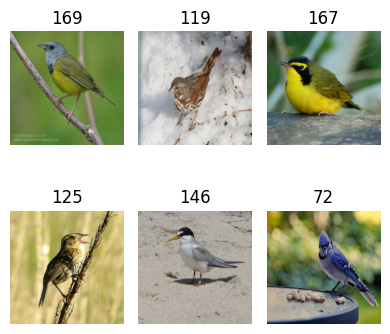

In [403]:
def show_images(dataset, num_images=5):
    # Get random samples from the dataset
    random_indices = torch.randperm(len(dataset))[:num_images]
    plt.figure(figsize=(4,4))
    # Iterate over the random indices and display images
    for index, idx in enumerate(random_indices):
        image, _ = dataset[idx]
  # Convert PIL image to tensor
        plt.subplot(2, 3, index + 1)
        plt.imshow(image.permute(1,2,0))  # Convert tensor to ndarray and display
        plt.axis('off')
        plt.title(_)
    plt.tight_layout()
    plt.show()
    
# Call the function to display images
show_images(dataset, num_images=6)

In [404]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

next(iter(train_loader))

[tensor([[[[0.9922, 0.9961, 0.9961,  ..., 0.9804, 0.9686, 0.9765],
           [0.9961, 0.9961, 0.9961,  ..., 0.9804, 0.9686, 0.9843],
           [0.9961, 0.9922, 0.9882,  ..., 0.9686, 0.9843, 0.9843],
           ...,
           [1.0000, 1.0000, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
          [[1.0000, 1.0000, 0.9961,  ..., 0.9961, 0.9922, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9882, 1.0000],
           [1.0000, 0.9961, 0.9922,  ..., 0.9961, 0.9961, 0.9922],
           ...,
           [1.0000, 1.0000, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
          [[0.9961, 1.0000, 0.9922,  ..., 0.9608, 0.9529, 0.9647],
           [0.9961, 0.9922, 0.9843,  ..., 0.9686, 0.9569, 0.9725],
           [0.9882, 0.97

In [405]:
# Load pre-trained InceptionV3 model
model = models.inception_v3(weights=True)

num_attribute_labels = 312


/Users/axelsorensen/miniconda3/envs/responsible_ai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [406]:
import os
import random
import pickle
import argparse
from os import listdir
from os.path import isfile, isdir, join
from collections import defaultdict as ddict


def extract_data(data_dir):
    cwd = os.getcwd()
    data_path = join(cwd, data_dir + "/images")
    val_ratio = 0.1

    path_to_id_map = dict()  # map from full image path to image id
    with open(data_path.replace("images", "images.txt"), "r") as f:
        for line in f:
            items = line.strip().split()
            path_to_id_map[join(data_path, items[1])] = int(items[0])

    attribute_labels_all = ddict(
        list
    )  # map from image id to a list of attribute labels
    attribute_certainties_all = ddict(
        list
    )  # map from image id to a list of attribute certainties
    attribute_uncertain_labels_all = ddict(
        list
    )  # map from image id to a list of attribute labels calibrated for uncertainty
    # 1 = not visible, 2 = guessing, 3 = probably, 4 = definitely
    uncertainty_map = {
        1: {
            1: 0,
            2: 0.5,
            3: 0.75,
            4: 1,
        },  # calibrate main label based on uncertainty label
        0: {1: 0, 2: 0.5, 3: 0.25, 4: 0},
    }
    with open(join(cwd, data_dir + "/attributes/image_attribute_labels.txt"), "r") as f:
        for line in f:
            file_idx, attribute_idx, attribute_label, attribute_certainty = (
                line.strip().split()[:4]
            )
            attribute_label = int(attribute_label)
            attribute_certainty = int(attribute_certainty)
            uncertain_label = uncertainty_map[attribute_label][attribute_certainty]
            attribute_labels_all[int(file_idx)].append(attribute_label)
            attribute_uncertain_labels_all[int(file_idx)].append(uncertain_label)
            attribute_certainties_all[int(file_idx)].append(attribute_certainty)

    is_train_test = dict()  # map from image id to 0 / 1 (1 = train)
    with open(join(cwd, data_dir + "/train_test_split.txt"), "r") as f:
        for line in f:
            idx, is_train = line.strip().split()
            is_train_test[int(idx)] = int(is_train)
    print(
        "Number of train images from official train test split:",
        sum(list(is_train_test.values())),
    )

    train_val_data, test_data = [], []
    train_data, val_data = [], []
    folder_list = [f for f in listdir(data_path) if isdir(join(data_path, f))]
    folder_list.sort()  # sort by class index
    for i, folder in enumerate(folder_list[:2]):
        folder_path = join(data_path, folder)
        classfile_list = [
            cf
            for cf in listdir(folder_path)
            if (isfile(join(folder_path, cf)) and cf[0] != ".")
        ]
        # classfile_list.sort()
        for cf in classfile_list:
            img_id = path_to_id_map[join(folder_path, cf)]
            img_path = join(folder_path, cf)
            metadata = {
                "id": img_id,
                "img_path": img_path,
                "img": dataset[i],
                "class_label": i,
                "attribute_label": torch.tensor(attribute_labels_all[img_id],dtype=torch.float32),
                "attribute_certainty": attribute_certainties_all[img_id],
                "uncertain_attribute_label": attribute_uncertain_labels_all[img_id],
            }
            if is_train_test[img_id]:
                train_val_data.append(metadata)
                # if val_files is not None:
                #     if img_path in val_files:
                #         val_data.append(metadata)
                #     else:
                #         train_data.append(metadata)
            else:
                test_data.append(metadata)

    random.shuffle(train_val_data)
    split = int(val_ratio * len(train_val_data))
    train_data = train_val_data[split:]
    val_data = train_val_data[:split]
    print("Size of train set:", len(train_data))
    return train_data, val_data, test_data

In [407]:
data_dir = f'{os.getcwd()}/CUB_200_2011/'
train_dataset, val_dataset, test_dataset = extract_data(data_dir)
train_loader = DataLoader(train_dataset, batch_size=32)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


Number of train images from official train test split: 5994
Size of train set: 54


In [408]:
print(next(iter(train_loader))['attribute_label'])

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [435]:
# Freeze pre-trained layers
for param in model.parameters():
    param.requires_grad = False

# Modify the top classification layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_attribute_labels)  # Adjust the number of output classes

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# Train the model
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        inputs = batch['img'][0]
        labels = batch['attribute_label']
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs, _ = model(inputs)
        print(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

KeyboardInterrupt: 

In [436]:
probs = torch.sigmoid(outputs[0])

# Selecting top 10 concepts for each image based on probabilities
top_probs, top_concepts = torch.topk(probs, 10)
top_concepts
result = []
for i in top_concepts:
    result.append(labels[0][i])

print(top_concepts,top_probs,result) 

tensor([220, 244, 260, 145, 149,  38, 132,  54, 164, 270]) tensor([0.6815, 0.6408, 0.6190, 0.6173, 0.6137, 0.5959, 0.5650, 0.5640, 0.5620,
        0.5429], grad_fn=<TopkBackward0>) [tensor(0.), tensor(0.), tensor(1.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.)]


In [425]:
torch.argmax(outputs[0])


TypeError: topk() missing 1 required positional arguments: "k"

In [415]:
# Evaluate the model


Test Accuracy: 0.0000
